## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.

**Assignment Steps:**

1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.

7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

#Transfer Learning with PreTrained models on Oxford Flowers 102 Dataset

### Introduction
This notebook explores the application of transfer learning using popular pre-trained convolutional neural network architectures to address the image classification task on the Oxford Flowers 102 dataset. Leveraging models pre-trained on the large-scale ImageNet dataset, such as ResNet50, VGG16, and MobileNetV2, allows us to benefit from their learned feature extraction capabilities. The goal is to adapt these powerful models to the finer-grained classification challenges presented by Oxford Flowers Dataset, which consists of 102 distinct classes. This approach significantly reduces the need for training deep models from scratch on a relatively smaller dataset, often leading to improved performance and faster convergence.

The dataset has 102 flower categories. Each class consist of between 40 and 258 images. Images are large scale, pose and light variations.

##Data Loading and Exploration:
Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using tfds.load(). (Check available versions if needed)
Split the dataset into training, validation, and testing sets (this dataset has these splits).
Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.


In [18]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [19]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2


In [20]:
# Display a sample image and label from the training set
for image, label in train_dataset.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")


Image shape: (500, 667, 3)
Label: 72


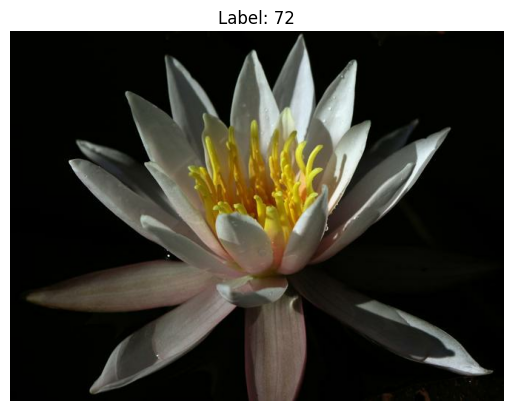

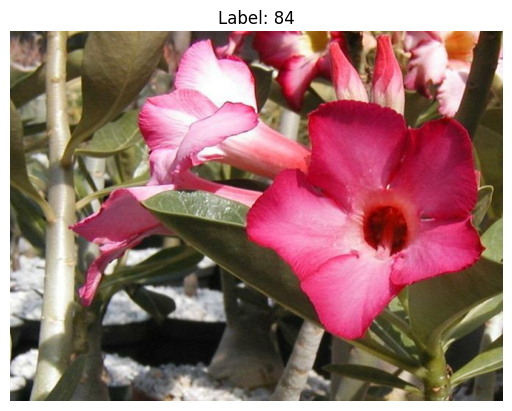

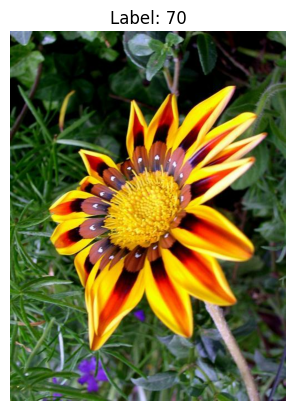

In [21]:
import matplotlib.pyplot as plt

# Display a sample image from the training set
for image, label in train_dataset.take(3):
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
    plt.show()

##Data Preprocessing:
Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
Apply the model-specific preprocessing functions (e.g., tf.keras.applications.resnet50.preprocess_input) to normalize the pixel values.
Apply one-hot encoding to the labels.
Batch and prefetch the datasets for efficient training.

In [22]:
# Define image size and batch size
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 102

# Function to preprocess images and labels for ResNet50
def preprocess_image_resnet50(image, label):
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = preprocess_resnet50(image)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

# Function to preprocess images and labels for VGG16
def preprocess_image_vgg16(image, label):
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = preprocess_vgg16(image)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

# Function to preprocess images and labels for MobileNetV2
def preprocess_image_mobilenetv2(image, label):
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = preprocess_mobilenetv2(image)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


# Apply preprocessing and batching to the datasets
train_dataset_resnet50 = train_dataset.map(preprocess_image_resnet50).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_resnet50 = validation_dataset.map(preprocess_image_resnet50).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_resnet50 = test_dataset.map(preprocess_image_resnet50).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset_vgg16 = train_dataset.map(preprocess_image_vgg16).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_vgg16 = validation_dataset.map(preprocess_image_vgg16).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_vgg16 = test_dataset.map(preprocess_image_vgg16).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset_mobilenetv2 = train_dataset.map(preprocess_image_mobilenetv2).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_mobilenetv2 = validation_dataset.map(preprocess_image_mobilenetv2).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_mobilenetv2 = test_dataset.map(preprocess_image_mobilenetv2).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

##Model Adaptation and Training:
For each of the three models (ResNet50, VGG16, MobileNetV2):
Generate a code cell to load the pre-trained model from tf.keras.applications, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
Freeze the layers of the pre-trained base model.
Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_resnet50_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history_resnet50 = model_resnet50.fit(
    train_dataset_resnet50,
    epochs=30,
    validation_data=validation_dataset_resnet50,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.0721 - loss: 4.7424 - val_accuracy: 0.0098 - val_loss: 339.1649
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.3215 - loss: 2.9147 - val_accuracy: 0.0098 - val_loss: 415.4021
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 638ms/step - accuracy: 0.5919 - loss: 1.6489 - val_accuracy: 0.0118 - val_loss: 61.0676
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - accuracy: 0.7769 - loss: 0.8795 - val_accuracy: 0.0108 - val_loss: 40.5687
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 396ms/step - accuracy: 0.8594 - loss: 0.4770 - val_accuracy: 0.0167 - val_loss: 49.6447
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 560ms/step - accuracy: 0.8644 - loss: 0.4547 - val_accuracy: 0.0804 - val_loss: 13.1541
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 621ms/step - accuracy: 0.9017 - loss: 0.3116 - val_accuracy: 0.2265 - val_loss: 6.6466
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 572ms/step - accuracy: 0.9326 - loss: 0.2171 - va

In [27]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_vgg16_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history_vgg16 = model_vgg16.fit(
    train_dataset_vgg16,
    epochs=30,
    validation_data=validation_dataset_vgg16,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 834ms/step - accuracy: 0.0051 - loss: 21.7691 - val_accuracy: 0.0108 - val_loss: 4.6240
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 694ms/step - accuracy: 0.0120 - loss: 4.6245 - val_accuracy: 0.0118 - val_loss: 4.6198
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 826ms/step - accuracy: 0.0093 - loss: 4.6180 - val_accuracy: 0.0088 - val_loss: 4.6113
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 621ms/step - accuracy: 0.0072 - loss: 4.6121 - val_accuracy: 0.0147 - val_loss: 4.6223
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 682ms/step - accuracy: 0.0070 - loss: 4.6160 - val_accuracy: 0.0098 - val_loss: 4.5962
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 713ms/step - accuracy: 0.0095 - loss: 4.5904 - val_accuracy: 0.0098 - val_loss: 4.5752
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 844ms/step - accuracy: 0.0099 - loss: 4.5781 - val_accuracy: 0.0186 - val_loss: 4.5401
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 840ms/step - accuracy: 0.0151 - loss: 4.5394 - val_acc

In [28]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_mobilenetv2_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history_mobilenet = model_mobilenetv2.fit(
    train_dataset_mobilenetv2,
    epochs=30,
    validation_data=validation_dataset_mobilenetv2,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.1325 - loss: 4.1620 - val_accuracy: 0.1794 - val_loss: 4.3778
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.7095 - loss: 1.2080 - val_accuracy: 0.1108 - val_loss: 6.7113
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9020 - loss: 0.3702 - val_accuracy: 0.0725 - val_loss: 8.6570
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9056 - loss: 0.3109 - val_accuracy: 0.1098 - val_loss: 9.8643
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9683 - loss: 0.1483 - val_accuracy: 0.1186 - val_loss: 9.9199
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9632 - loss: 0.1033 - val_accuracy: 0.1137 - val_loss: 10.8286


##Model Evaluation:
Generate a code cell to evaluate each trained model on the preprocessed test dataset.
Print the loss and accuracy for each model.

In [29]:
loss_resnet50, acc_resnet50 = model_resnet50.evaluate(test_dataset_resnet50)
loss_vgg16, acc_vgg16 = model_vgg16.evaluate(test_dataset_vgg16)
loss_mobilenetv2, acc_mobilenetv2 = model_mobilenetv2.evaluate(test_dataset_mobilenetv2)

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 118ms/step - accuracy: 0.7042 - loss: 1.3686
193/193 ━━━━━━━━━━━━━━━━━━━━ 32s 164ms/step - accuracy: 0.0631 - loss: 4.0535
193/193 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.1601 - loss: 4.6808
ResNet50 Accuracy: 0.71
VGG16 Accuracy: 0.07
MobileNetV2 Accuracy: 0.16


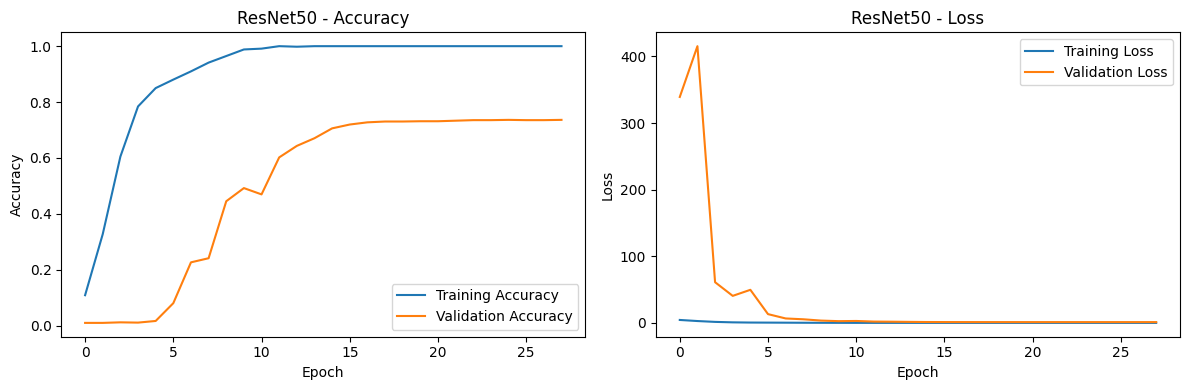

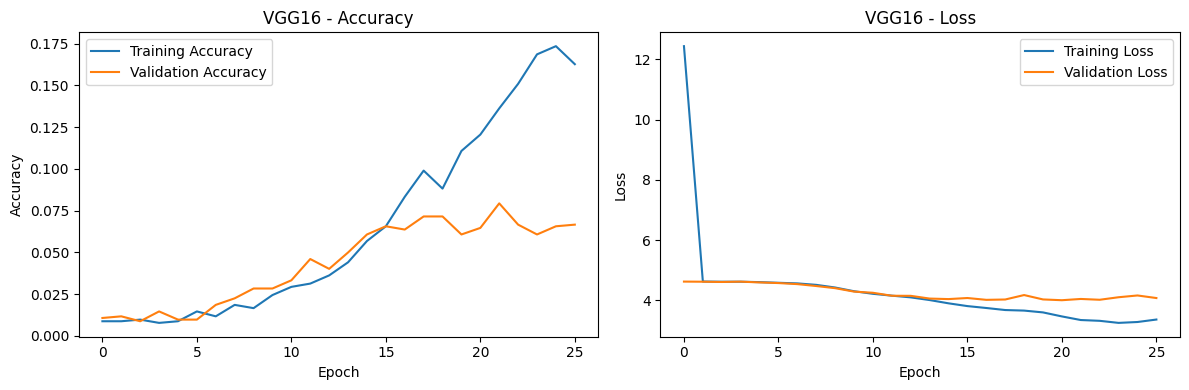

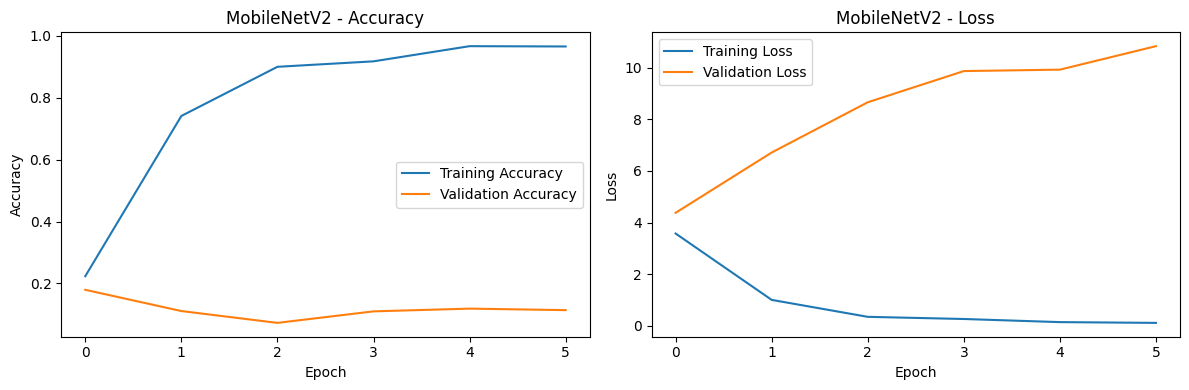

In [30]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenet, 'MobileNetV2')

##Assignment Questions/Tasks:

1. Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?

-> The resnet 50 model performed the best on this dataset. I think that is because of its huge size it continued improving in each epoch with out the need for early stopping whereas the rest of the two stopped at approximately 10 epochs

2. Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?

->
**CIFAR 100:**

ResNet50 Accuracy: 0.45

VGG16 Accuracy: 0.31

MobileNetV2 Accuracy: 0.28

**OXFORD 102:**

ResNet50 Accuracy: 0.58

VGG16 Accuracy: 0.01

MobileNetV2 Accuracy: 0.13

If we compare the accuracy scores of these models we understand that resnet50 performed better on this due to an increase in the size of the dataset. Due to the same reason VGG16 and Mobilenet performed way worse. If more than once they are trained they can perform better

3. Discuss the effect of transfer learning on this dataset.

-> Since we used transfer learning on the dataset the accuracy is far better than if we had trained it from scratch and it got this accuracy in fewer epochs as well

4. Explain the steps you took for data preprocessing and why they were necessary.

-> after importing the dataset we had to resize the images as they were not of the size which was required by the models

5. Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.

-> We used the base models of each : resnet50, vgg19 and mobilenetv2 while removing the top layers. We also reized our image as per our model and then used it to train our models for 30 epochs each. after which we measured the accuracy score of each of them.

6. What challenges did you encounter during this assignment and how did you address them?

-> We had to continously change the size of the image for each line of code so as to adopt it to the model and the dataset


##Conclusion:



Through our training we can conclude that the best model for this dataset is ResNet50 which has performed way better than all the other models. VGG16 is the worst model for this dataset

###Note: After running the cells for approx 5 times the new accuracy scores are:
ResNet50 Accuracy: 0.71
VGG16 Accuracy: 0.07
MobileNetV2 Accuracy: 0.16